In [19]:
## Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [26]:
## Load Dataset
data = pd.read_csv('Customer-Churn.csv')

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
# Drop customerID column
data.drop('customerID', axis=1, inplace=True)


# Handle missing values in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values in other columns
imputer = SimpleImputer(strategy='median')
data['TotalCharges'] = imputer.fit_transform(data[['TotalCharges']])
data.fillna(method='ffill', inplace=True)  # Forward fill for remaining missing values

# Encode categorical variables
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols] = scaler.fit_transform(data[num_cols])

# Save preprocessed data
data.to_csv('preprocessed_customer_data.csv', index=False)

In [29]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,No,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,No,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,Yes,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,No,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,Yes,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


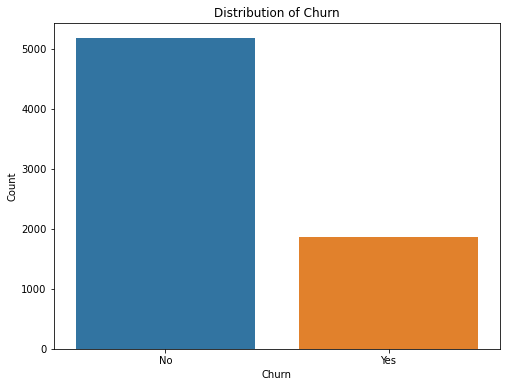

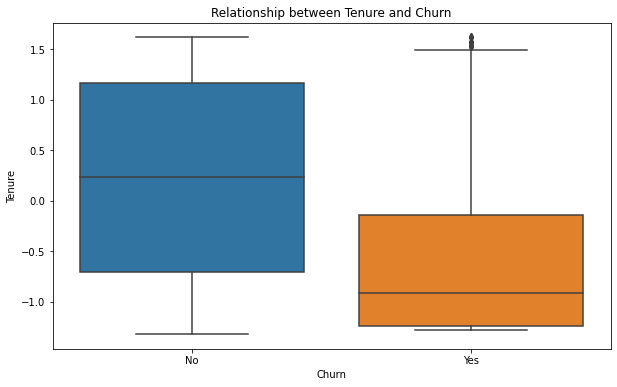

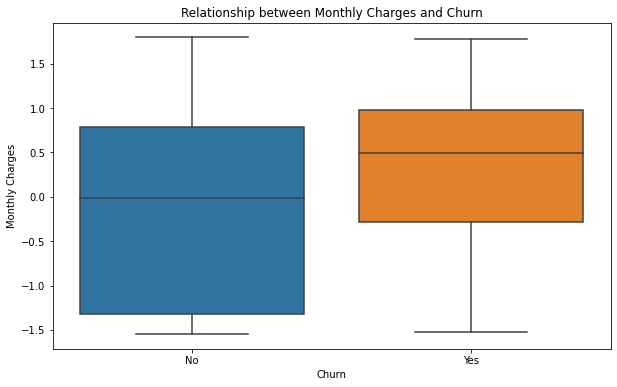

In [30]:
# Code snippet for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Relationship between tenure and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

# Relationship between monthly charges and churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Relationship between Monthly Charges and Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train gradient boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate models
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

lr_precision = precision_score(y_test, lr_preds, pos_label='Yes')
rf_precision = precision_score(y_test, rf_preds, pos_label='Yes')
gb_precision = precision_score(y_test, gb_preds, pos_label='Yes')

lr_recall = recall_score(y_test, lr_preds, pos_label='Yes')
rf_recall = recall_score(y_test, rf_preds, pos_label='Yes')
gb_recall = recall_score(y_test, gb_preds, pos_label='Yes')

lr_f1_score = f1_score(y_test, lr_preds, pos_label='Yes')
rf_f1_score = f1_score(y_test, rf_preds, pos_label='Yes')
gb_f1_score = f1_score(y_test, gb_preds, pos_label='Yes')

In [34]:
# Code snippet for model evaluation
print("Logistic Regression Model:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)
print()

print("Random Forest Model:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print()

print("Gradient Boosting Model:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1_score)
print()



Logistic Regression Model:
Accuracy: 0.8211497515968772
Precision: 0.6861538461538461
Recall: 0.5978552278820375
F1 Score: 0.6389684813753581

Random Forest Model:
Accuracy: 0.7977288857345636
Precision: 0.664179104477612
Recall: 0.4772117962466488
F1 Score: 0.5553822152886115

Gradient Boosting Model:
Accuracy: 0.8090844570617459
Precision: 0.6721854304635762
Recall: 0.5442359249329759
F1 Score: 0.6014814814814815



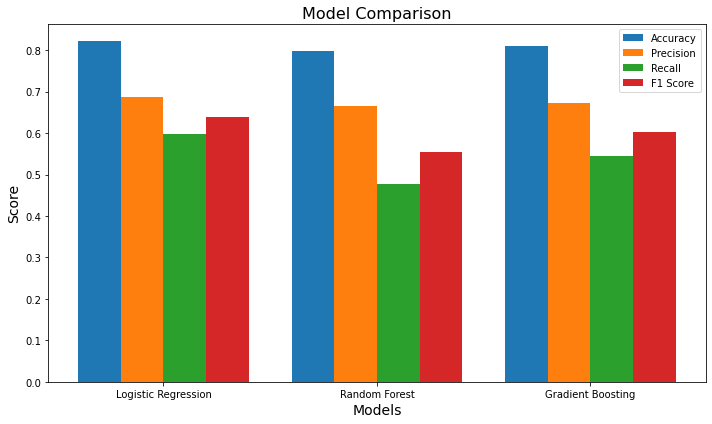

In [35]:
import matplotlib.pyplot as plt

# Define model names
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Define metric scores for each model
accuracies = [lr_accuracy, rf_accuracy, gb_accuracy]
precisions = [lr_precision, rf_precision, gb_precision]
recalls = [lr_recall, rf_recall, gb_recall]
f1_scores = [lr_f1_score, rf_f1_score, gb_f1_score]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.2

# Define index for bar positions
index = range(len(models))

# Plot bars for each metric
plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar([idx + bar_width for idx in index], precisions, bar_width, label='Precision')
plt.bar([idx + 2 * bar_width for idx in index], recalls, bar_width, label='Recall')
plt.bar([idx + 3 * bar_width for idx in index], f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Model Comparison', fontsize=16)
plt.xticks([idx + 1.5 * bar_width for idx in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


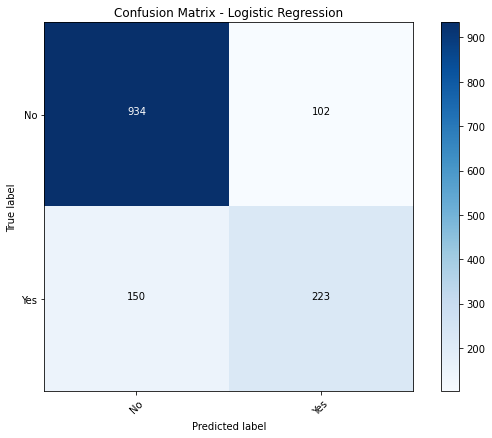

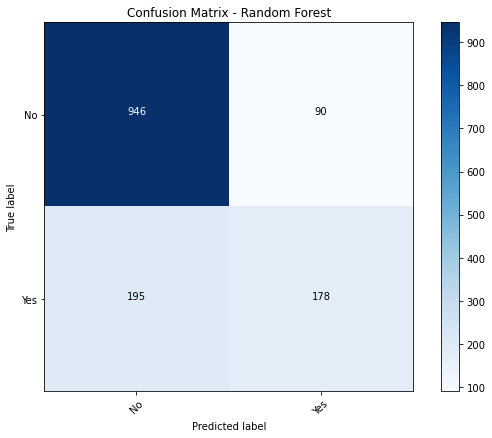

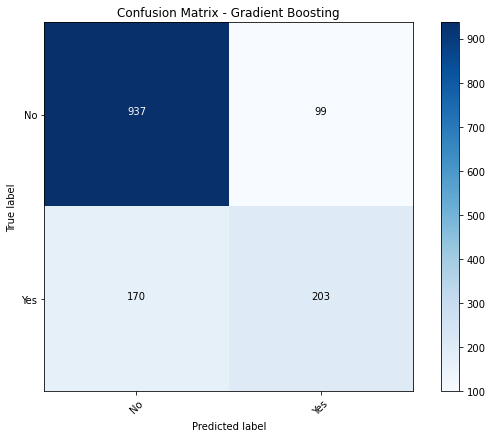

NameError: name 'lr_probs' is not defined

In [37]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    classes = ['No', 'Yes']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix('Logistic Regression', y_test, lr_preds)
plot_confusion_matrix('Random Forest', y_test, rf_preds)
plot_confusion_matrix('Gradient Boosting', y_test, gb_preds)

# Define function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for each model
plot_roc_curve('Logistic Regression', y_test, lr_probs)
plot_roc_curve('Random Forest', y_test, rf_probs)
plot_roc_curve('Gradient Boosting', y_test, gb_probs)